In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("datasets/linkedin.csv")
data

,Unnamed: 0,review_text,review_rating,review_likes,Unnamed: 4,Unnamed: 5
0,0,Well designed app. It's much easier to use tha...,5,0,NaN,NaN
1,1,Cool!,5,1,NaN,NaN
2,2,Great to finally see this on the market!,5,0,NaN,NaN
3,3,Great app,5,1,NaN,NaN
4,4,Finally! Would love a Homeycomb specific versi...,4,0,NaN,NaN
...,...,...,...,...,...,...
322636,322636,Better experience,5,0,NaN,NaN
322637,322637,Great networking app!,5,0,NaN,NaN
322638,322638,For the love of God! Please activate your cust...,2,0,NaN,NaN
322639,322639,Excepcional,5,0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322641 entries, 0 to 322640
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     322641 non-null  int64  
 1   review_text    320925 non-null  object 
 2   review_rating  322641 non-null  int64  
 3   review_likes   322641 non-null  int64  
 4   Unnamed: 4     0 non-null       float64
 5   Unnamed: 5     0 non-null       float64
dtypes: float64(2), int64(3), object(1)
memory usage: 14.8+ MB


In [4]:
data.isnull().sum()

Unnamed: 0            0
review_text        1716
review_rating         0
review_likes          0
Unnamed: 4       322641
Unnamed: 5       322641
dtype: int64

In [5]:
data = data.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 0', 'review_likes'])

In [6]:
data = data.dropna(subset=['review_text'])

In [7]:
data.head()

,review_text,review_rating
0,Well designed app. It's much easier to use tha...,5
1,Cool!,5
2,Great to finally see this on the market!,5
3,Great app,5
4,Finally! Would love a Homeycomb specific versi...,4


In [8]:
data.columns

Index(['review_text', 'review_rating'], dtype='object')

In [9]:
data.isnull().sum()

review_text      0
review_rating    0
dtype: int64

In [10]:
from collections import Counter
from wordcloud import WordCloud

In [11]:
# Word frequency
all_words = ' '.join(data['review_text'])
word_counts = Counter(all_words.split())


In [12]:
# Display most common words
print(word_counts.most_common(10))

[('to', 97254), ('the', 76195), ('and', 67334), ('I', 66200), ('app', 59607), ('a', 44076), ('is', 43421), ('for', 42933), ('it', 37717), ('Good', 31710)]


### Common Words:
Many of the top words are common stopwords like "to," "the," "and," and "I," which are not very informative for sentiment analysis or topic modeling. 



### Relevant Words:
Words like "app" and "Good" are more contextually relevant and could offer insights into the subject matter of the reviews.

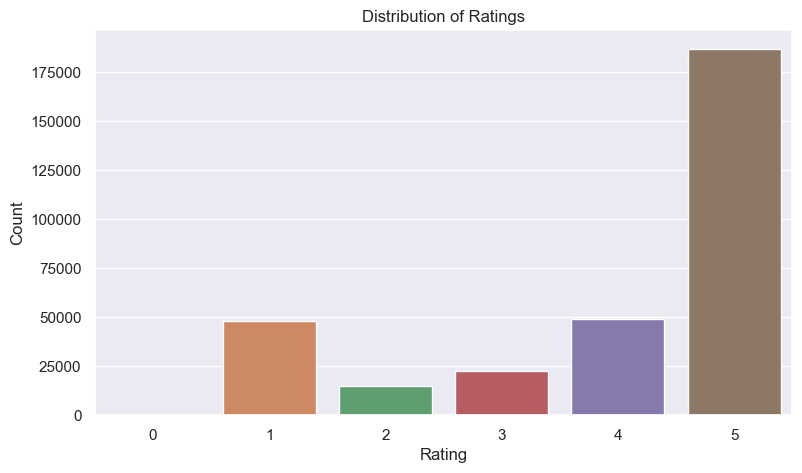

In [23]:
# Plotting the distribution of ratings
sns.set(style="darkgrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=data, x='review_rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Ratings Distribution:

Rating 1: This suggests a significant number of low ratings or negative feedback.
Rating 4: Indicates a substantial amount of positive but not perfect feedback.
Rating 5: Shows that many reviewers are extremely satisfied or gave the highest rating.
Insights:

The peak at 5 suggests that while there are a lot of positive reviews, there might also be a substantial number of negative reviews.
The presence of ratings 1 indicates some dissatisfaction among users.

Next, we’ll analyze the length of the reviews, as this can sometimes correlate with the sentiment or detail of feedback. We will first calculate the length of each review and then visualize the data:

C:\Users\sushm\.anaconda\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


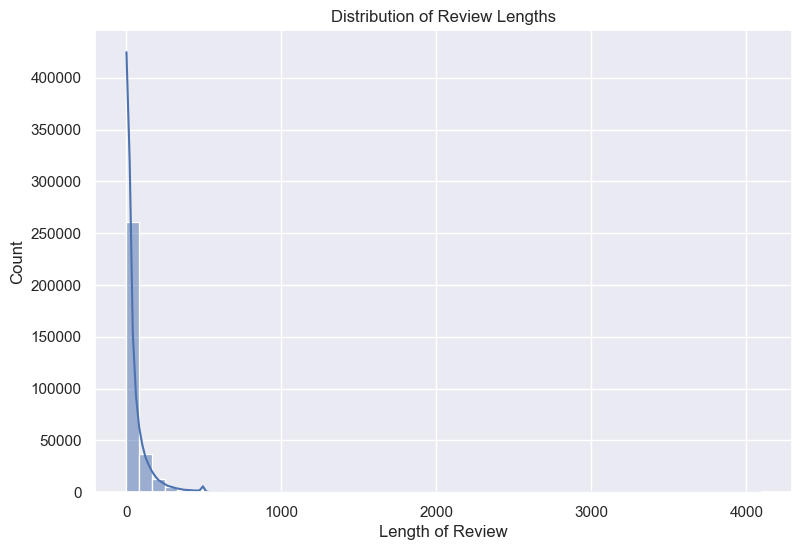

In [29]:
# Calculating the length of each review
data['Review Length'] = data['review_text'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

## Adding Sentiment Labels in the Data
Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative. 

In [33]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 445.2 kB/s eta 0:00:02
   ------- -------------------------------- 112.6/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/626.3 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/626.3 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.3 MB/s eta 0:00:00


In [35]:
from textblob import TextBlob

In [42]:
def textblob_sentiment_analysis(review_text):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review_text).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
data['Sentiment'] = data['review_text'].apply(textblob_sentiment_analysis)

data.head()

,review_text,review_rating,Review Length,Sentiment
0,Well designed app. It's much easier to use tha...,5,73,Positive
1,Cool!,5,5,Positive
2,Great to finally see this on the market!,5,40,Positive
3,Great app,5,9,Positive
4,Finally! Would love a Homeycomb specific versi...,4,56,Positive


# Analyzing App Reviews Sentiments

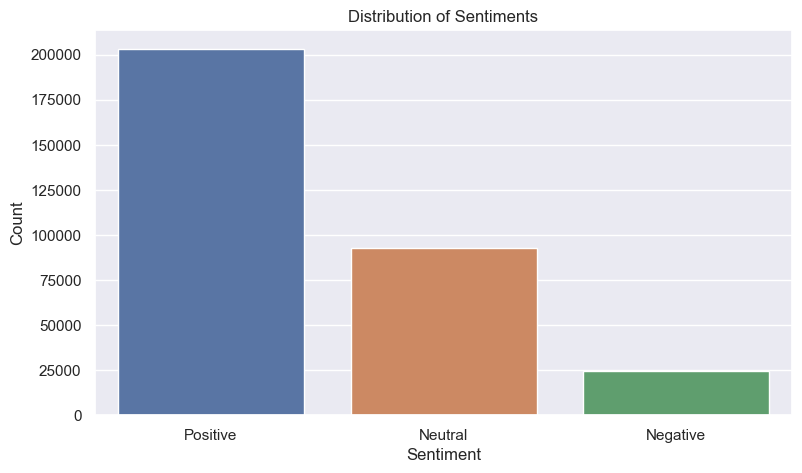

In [44]:
# Analyzing the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The analysis of sentiment distribution in the dataset reveals a predominance of positive sentiments. The bar plot shows that most reviews express favorable opinions, indicating high overall satisfaction. This positive sentiment trend provides insight into the general customer experience and highlights areas of success.

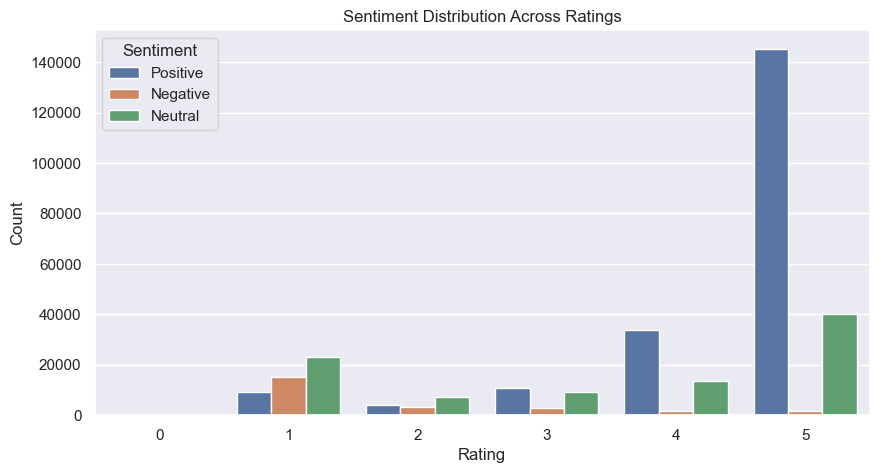

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='review_rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [48]:
data.columns

Index(['review_text', 'review_rating', 'Review Length', 'Sentiment'], dtype='object')

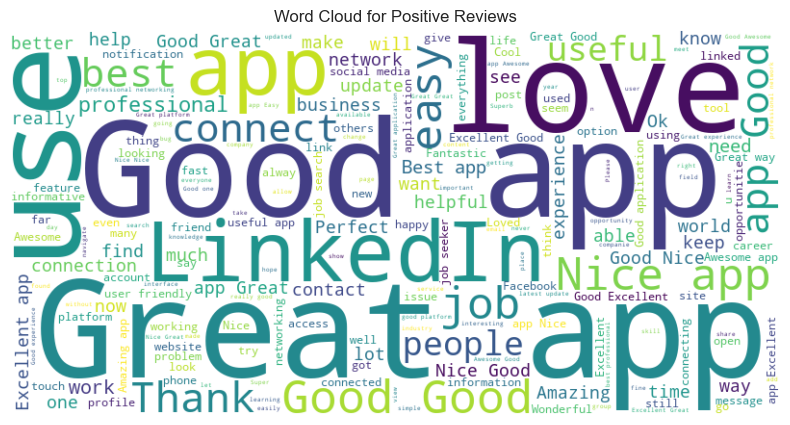

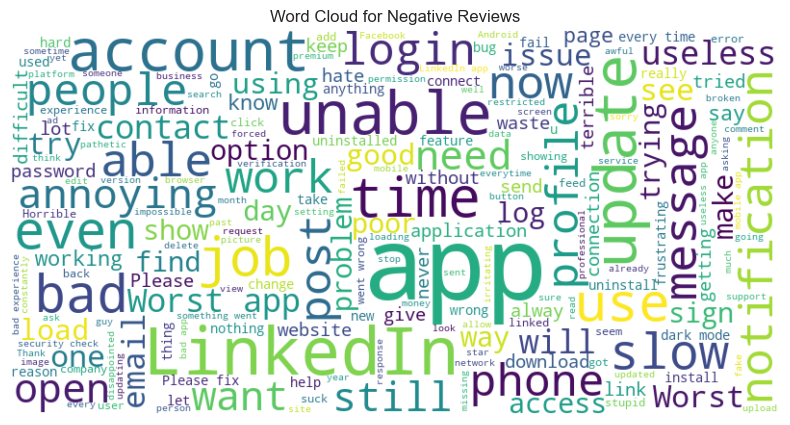

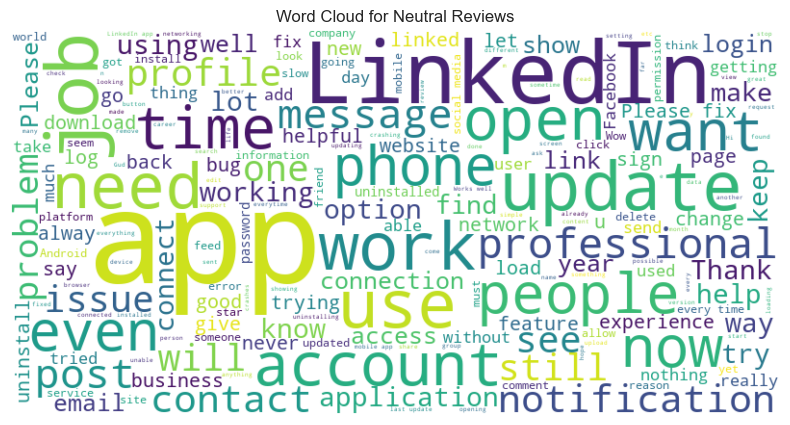

In [52]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

So, this is how you can perform Reviews Sentiment Analysis using Python.